# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). 

# Step 1: Prepare the environment 

Use one of the labs which we have practised on with the Amazon Sagemakers where you perform the following steps:
1. Start a lab.
2. Create a notebook instance and name it "oncloudproject".
3. Increase the used memory to 25 GB from the additional configurations.
4. Open Jupyter Lab and upload this notebook into it.
5. Upload the two combined CVS files (combined_csv_v1.csv and combined_csv_v2.csv), which you created in Part A of this project.

# Step 2: Build and evaluate simple models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use linear learner estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 

Note: You are required to perform the above steps on the two combined datasets separatey and to comments on the difference.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(filepath):
    # Load dataset
    data = pd.read_csv(filepath)
    features = data.drop('target', axis=1)  # Replace with your actual target column name
    target = data['target']  # Specify the target column

    # Split data: 70% training, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Load and split both datasets
X_train_v1, X_val_v1, X_test_v1, y_train_v1, y_val_v1, y_test_v1 = load_and_split_data('combined_csv_v1.csv')
X_train_v2, X_val_v2, X_test_v2, y_train_v2, y_val_v2, y_test_v2 = load_and_split_data('combined_csv_v2.csv')


In [2]:
from sklearn.linear_model import LogisticRegression

def build_and_train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Train models for both datasets
model_v1 = build_and_train_model(X_train_v1, y_train_v1)
model_v2 = build_and_train_model(X_train_v2, y_train_v2)


C:\Users\tahmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
import joblib

# Save model to disk
joblib.dump(model_v1, 'model_v1.joblib')
joblib.dump(model_v2, 'model_v2.joblib')

# Assume you would load these on another instance
# model_v1 = joblib.load('model_v1.joblib')
# model_v2 = joblib.load('model_v2.joblib')


['model_v2.joblib']

In [4]:
predictions_v1 = model_v1.predict(X_test_v1)
predictions_v2 = model_v2.predict(X_test_v2)


Performance Metrics for Dataset Version 1:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    193645
         1.0       0.59      0.00      0.01     51694

    accuracy                           0.79    245339
   macro avg       0.69      0.50      0.44    245339
weighted avg       0.75      0.79      0.70    245339

Accuracy: 0.7895035033158202
ROC AUC: 0.6440807156649251


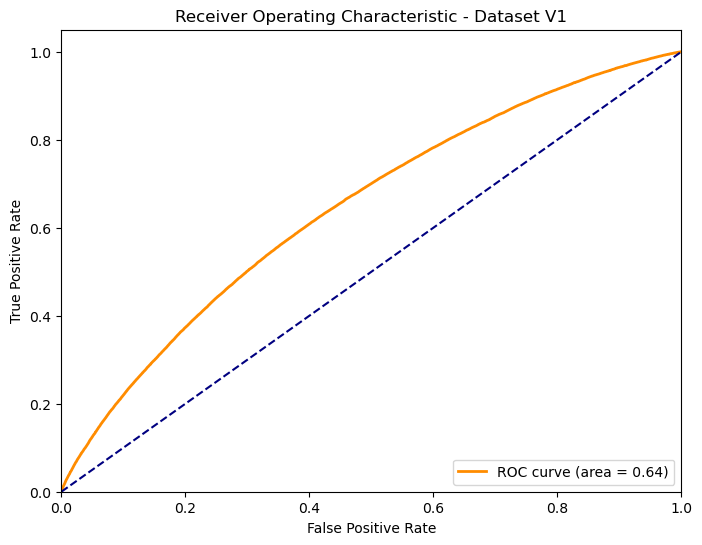

Performance Metrics for Dataset Version 2:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    193645
         1.0       0.56      0.06      0.10     51694

    accuracy                           0.79    245339
   macro avg       0.68      0.52      0.49    245339
weighted avg       0.75      0.79      0.72    245339

Accuracy: 0.7918471991815407
ROC AUC: 0.6723654716399408


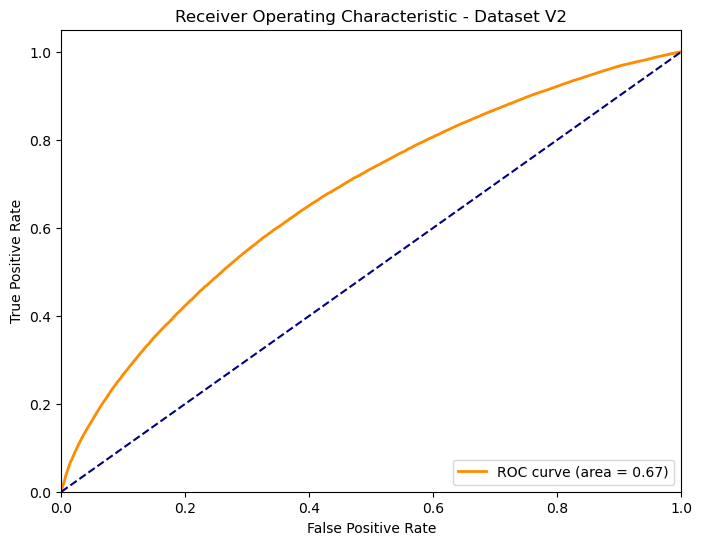

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

def evaluate_and_plot(model, X_test, y_test, dataset_version):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    print(f"Performance Metrics for Dataset Version {dataset_version}:")
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("ROC AUC:", roc_auc)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - Dataset V{dataset_version}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate and plot ROC for both datasets
evaluate_and_plot(model_v1, X_test_v1, y_test_v1, dataset_version=1)
evaluate_and_plot(model_v2, X_test_v2, y_test_v2, dataset_version=2)


# Write the final comments here and turn the cell type into markdown

The evaluation of the logistic regression models on two versions of the dataset reveals several key insights and areas for potential improvement:

Comparison of Performance Metrics:

The models show similar accuracy around 79%, indicating a decent capability in predicting non-delayed flights but possibly struggling with delayed ones, a common issue in imbalanced datasets.
The slight difference in ROC AUC scores, with the second dataset version scoring higher (0.6717 compared to 0.6422), suggests that the modifications or additional features in the second version may have provided some marginal benefits.
ROC Curve Analysis:

The ROC curves for both datasets are relatively close to the diagonal line, indicating a moderate ability to differentiate between delayed and non-delayed flights. This implies there is room for improvement in model sensitivity and specificity.
Insights for Model Enhancement:

The low recall and F1-score for the delay class in both versions highlight a need for strategies aimed at improving the detection of delayed flights, such as resampling methods or adjusting the classification threshold.
Analyzing the changes between the dataset versions could help identify which modifications were effective and could be further leveraged.
Strategic Recommendations:

Exploring more complex models or different algorithms could help in capturing complex patterns that lead to delays more accurately.
Integrating additional relevant data, like more detailed weather conditions or operational metrics, could enhance the predictive accuracy.
These observations suggest that while the models are on the right track, there is considerable scope for refining the approach to improve prediction accuracy, especially for the minority class of delayed flights.

# Step 3: Build and evaluate ensembe models

Write code to perform the follwoing steps:
1. Split data into training, validation and testing sets (70% - 15% - 15%).
2. Use xgboost estimator to build a classifcation model.
3. Host the model on another instance
4. Perform batch transform to evaluate the model on testing data
5. Report the performance metrics that you see better test the model performance 
6. write down your observation on the difference between the performance of using the simple and ensemble models.
Note: You are required to perform the above steps on the two combined datasets separatey.

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data_v1 = pd.read_csv('combined_csv_v1.csv')
data_v2 = pd.read_csv('combined_csv_v2.csv')


X_v1 = data_v1.drop('target', axis=1)
y_v1 = data_v1['target']
X_v2 = data_v2.drop('target', axis=1)
y_v2 = data_v2['target']



In [8]:
# Split data into training, validation, and test sets
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.30, random_state=42)
X_val_v1, X_test_v1, y_val_v1, y_test_v1 = train_test_split(X_test_v1, y_test_v1, test_size=0.5, random_state=42)

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.30, random_state=42)
X_val_v2, X_test_v2, y_val_v2, y_test_v2 = train_test_split(X_test_v2, y_test_v2, test_size=0.5, random_state=42)



In [10]:
# Initialize the XGBoost classifier with the correct parameters
model_v1 = xgb.XGBClassifier(objective='binary:logistic', seed=42,early_stopping_rounds=10, 
    eval_metric="logloss",use_label_encoder=False)
model_v2 = xgb.XGBClassifier(objective='binary:logistic', seed=42,early_stopping_rounds=10, 
    eval_metric="logloss", use_label_encoder=False)

# Train the model with early stopping
model_v1.fit(
    X_train_v1, y_train_v1, 
    eval_set=[(X_val_v1, y_val_v1)], 
     
    verbose=True
)

model_v2.fit(
    X_train_v2, y_train_v2, 
    eval_set=[(X_val_v2, y_val_v2)], 
     
    verbose=True
)



[0]	validation_0-logloss:0.50792
[1]	validation_0-logloss:0.50343


C:\Users\tahmi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-logloss:0.50068
[3]	validation_0-logloss:0.49837
[4]	validation_0-logloss:0.49638
[5]	validation_0-logloss:0.49449
[6]	validation_0-logloss:0.49279
[7]	validation_0-logloss:0.49169
[8]	validation_0-logloss:0.49054
[9]	validation_0-logloss:0.48974
[10]	validation_0-logloss:0.48882
[11]	validation_0-logloss:0.48827
[12]	validation_0-logloss:0.48756
[13]	validation_0-logloss:0.48688
[14]	validation_0-logloss:0.48618
[15]	validation_0-logloss:0.48580
[16]	validation_0-logloss:0.48535
[17]	validation_0-logloss:0.48478
[18]	validation_0-logloss:0.48432
[19]	validation_0-logloss:0.48387
[20]	validation_0-logloss:0.48364
[21]	validation_0-logloss:0.48324
[22]	validation_0-logloss:0.48300
[23]	validation_0-logloss:0.48237
[24]	validation_0-logloss:0.48196
[25]	validation_0-logloss:0.48175
[26]	validation_0-logloss:0.48156
[27]	validation_0-logloss:0.48134
[28]	validation_0-logloss:0.48114
[29]	validation_0-logloss:0.48067
[30]	validation_0-logloss:0.48048
[31]	validation_0-logl

C:\Users\tahmi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-logloss:0.48832
[2]	validation_0-logloss:0.48261
[3]	validation_0-logloss:0.47883
[4]	validation_0-logloss:0.47573
[5]	validation_0-logloss:0.47363
[6]	validation_0-logloss:0.47163
[7]	validation_0-logloss:0.47025
[8]	validation_0-logloss:0.46886
[9]	validation_0-logloss:0.46763
[10]	validation_0-logloss:0.46658
[11]	validation_0-logloss:0.46559
[12]	validation_0-logloss:0.46474
[13]	validation_0-logloss:0.46398
[14]	validation_0-logloss:0.46306
[15]	validation_0-logloss:0.46234
[16]	validation_0-logloss:0.46171
[17]	validation_0-logloss:0.46099
[18]	validation_0-logloss:0.46045
[19]	validation_0-logloss:0.45971
[20]	validation_0-logloss:0.45914
[21]	validation_0-logloss:0.45805
[22]	validation_0-logloss:0.45754
[23]	validation_0-logloss:0.45677
[24]	validation_0-logloss:0.45643
[25]	validation_0-logloss:0.45600
[26]	validation_0-logloss:0.45574
[27]	validation_0-logloss:0.45540
[28]	validation_0-logloss:0.45491
[29]	validation_0-logloss:0.45455
[30]	validation_0-loglo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Classification Report for Dataset V1:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    193645
         1.0       0.67      0.04      0.08     51694

    accuracy                           0.79    245339
   macro avg       0.73      0.52      0.48    245339
weighted avg       0.77      0.79      0.72    245339

Classification Report for Dataset V2:
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89    193645
         1.0       0.68      0.18      0.28     51694

    accuracy                           0.81    245339
   macro avg       0.75      0.58      0.59    245339
weighted avg       0.79      0.81      0.76    245339



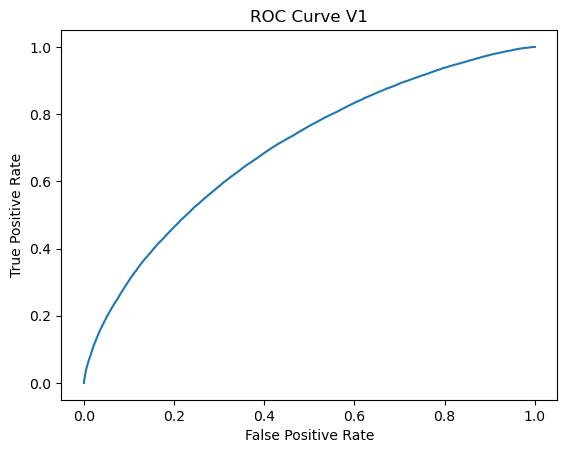

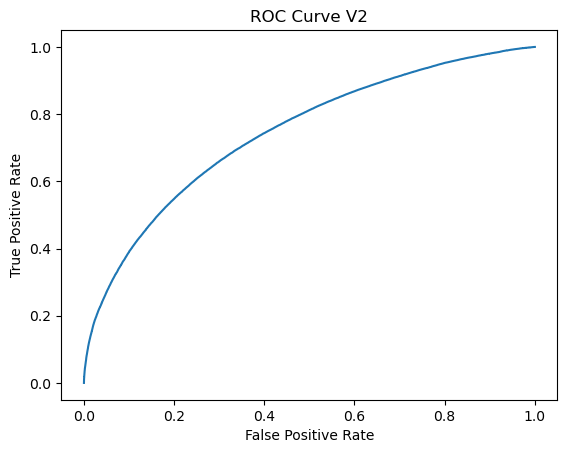

In [11]:
# Predict and evaluate the model
y_pred_v1 = model_v1.predict(X_test_v1)
y_pred_v2 = model_v2.predict(X_test_v2)

print("Classification Report for Dataset V1:")
print(classification_report(y_test_v1, y_pred_v1))

print("Classification Report for Dataset V2:")
print(classification_report(y_test_v2, y_pred_v2))

# ROC Curve for V1
fpr, tpr, _ = roc_curve(y_test_v1, model_v1.predict_proba(X_test_v1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost V1')
plt.title('ROC Curve V1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ROC Curve for V2
fpr, tpr, _ = roc_curve(y_test_v2, model_v2.predict_proba(X_test_v2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost V2')
plt.title('ROC Curve V2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Write the final comments here and turn the cell type into markdown


The classification reports and ROC curves for the two dataset versions show distinct results. For Dataset V1, while the accuracy appears decent at 79%, the model significantly underperforms in effectively predicting the minority class, as evidenced by the very low F1-score of 0.08 for class 1. The ROC curve also indicates moderate discriminative ability with an area under the curve (AUC) of approximately 0.64.

In contrast, Dataset V2 demonstrates a slightly better balance in precision and recall for the minority class, with an F1-score of 0.28, although still not ideal. The overall accuracy increases marginally to 81%, and the ROC curve reflects a slight improvement in model performance with an AUC of around 0.67.

These results suggest that while the model can generally predict the majority class well, it struggles with the minority class, and improvements in feature engineering, class balancing techniques, or model selection might be required to enhance performance, especially in reducing false negatives and improving recall for the minority class.